<a href="https://colab.research.google.com/github/sumitgaurav25/python---practice/blob/main/a1DL_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [31]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [32]:
X_train = X_train / 255
X_test = X_test / 255

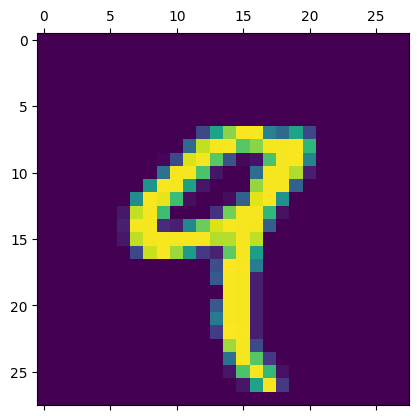

In [33]:
plt.matshow(X_train[4])

In [34]:
print(y_train[4])

9


In [35]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [36]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = "sigmoid")
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8177 - loss: 0.7135
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9120 - loss: 0.3120
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9205 - loss: 0.2832
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9243 - loss: 0.2694
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9245 - loss: 0.2683


In [37]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9150 - loss: 0.3065


[0.27071285247802734, 0.925599992275238]

In [38]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.4404611e-02, 3.3837850e-07, 4.3061711e-02, 9.4503075e-01,
       2.3810568e-03, 8.1180923e-02, 1.3031994e-06, 9.9975252e-01,
       9.5836751e-02, 6.0207534e-01], dtype=float32)

In [39]:
y_pred = np.argmax(y_predicted[0])
print(y_pred)

7


In [41]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:6])

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1)]


In [42]:
print(y_test[:6])

[7 2 1 0 4 1]


In [43]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
print(cm)

tf.Tensor(
[[ 969    0    0    2    0    4    3    1    1    0]
 [   0 1117    3    2    0    1    4    2    6    0]
 [  11   12  908   19   10    3   13   11   41    4]
 [   4    0   15  918    0   29    2   11   23    8]
 [   2    1    2    1  919    0   11    4    9   33]
 [  12    3    1   30    9  781   14    6   30    6]
 [  15    3    4    1    7   12  914    1    1    0]
 [   2    5   20    6    8    0    0  952    4   31]
 [  12    9    5   21    9   27    9   12  864    6]
 [  12    7    1   10   33    5    0   21    6  914]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

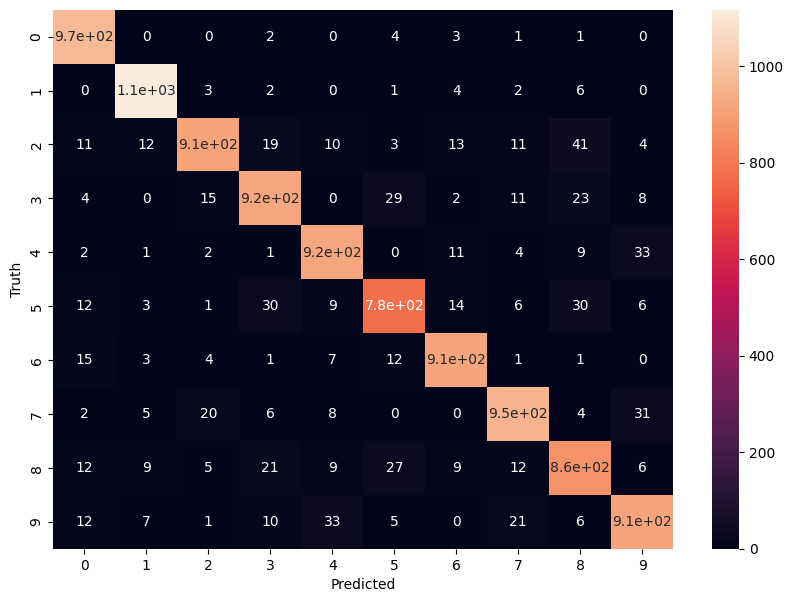

In [44]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

Applying a Hidden Layer

In [47]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8713 - loss: 0.4565
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9592 - loss: 0.1384
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9735 - loss: 0.0910
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9792 - loss: 0.0689
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9850 - loss: 0.0503


In [48]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

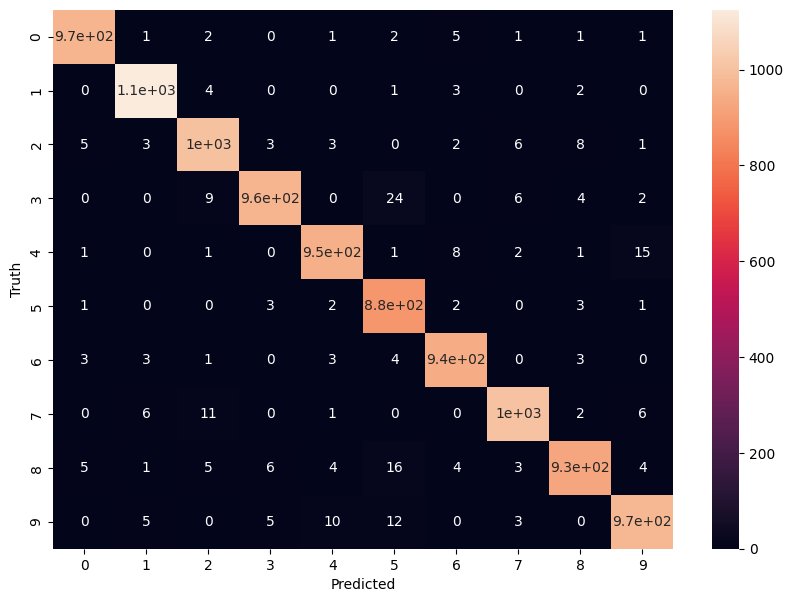

In [51]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8723 - loss: 0.4588
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9623 - loss: 0.1304
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9719 - loss: 0.0905
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9803 - loss: 0.0668
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9850 - loss: 0.0488


In [3]:
revenue = np.array([[180, 200, 300],[24, 36, 40],[12, 18, 20]])
expenses = np.array([[80, 90, 100], [10, 16, 20], [8, 10, 10]])

In [4]:
profit = revenue - expenses
print(profit)

[[100 110 200]
 [ 14  20  20]
 [  4   8  10]]


In [6]:
price_per_unit = np.array([1000, 400, 1200])
units = np.array([[30, 40, 50],[5, 10, 15],[2, 5, 7]])

In [8]:
revenue_usd = np.array([[200, 220, 250], [68, 79, 105], [110, 140, 180], [80, 85, 90]])
print(revenue_usd)

[[200 220 250]
 [ 68  79 105]
 [110 140 180]
 [ 80  85  90]]


In [10]:
conversion_rate = 90.69
revenue_inr = np.dot(conversion_rate, revenue_usd)
print(revenue_inr)

[[18138.   19951.8  22672.5 ]
 [ 6166.92  7164.51  9522.45]
 [ 9975.9  12696.6  16324.2 ]
 [ 7255.2   7708.65  8162.1 ]]


In [12]:
units_sold = np.array([[50, 60, 25], [10, 13, 15], [40, 70, 52]])
price_per_unit = ([20, 30, 15])

revenue = np.dot(price_per_unit, units_sold)
print(revenue)

[1900 2640 1730]


In [24]:
y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.3, 0.7, 1, 0, 0.5])

In [16]:
def mae(y_predicted, y_true):
  total_error = 0
  for yp, yt in zip(y_predicted, y_true):
    total_error += abs(yt - yp)

  print(total_error)
  MAE = total_error/ len(y_true)
  return MAE

In [17]:
mae(y_predicted, y_true)

2.5


np.float64(0.5)

In [25]:
y_true

array([0.3, 0.7, 1. , 0. , 0.5])

In [26]:
np.mean(np.abs(y_predicted -  y_true))

np.float64(0.5)

In [28]:
def mse(y_predicted, y_true):
  total_error = 0
  for yp, yt in zip(y_predicted, y_true):
    total_error += (abs(yt - yp) ** 2)

  print(total_error)
  MSE = total_error/ len(y_true)
  return MSE

In [29]:
mse(y_predicted, y_true)

1.83


np.float64(0.366)

In [30]:
np.mean(np.square(np.abs(y_predicted - y_true)))

np.float64(0.366)

In [33]:
def log_loss(y_true, y_predicted):
  epsilon = 1e-15
  y_predicted_new = [max(i, epsilon) for i in y_predicted]
  y_predicted_new = [min(i, epsilon) for i in y_predicted_new]
  y_predicted_new = np.array(y_predicted_new)
  log_l = -np.mean(y_true*np.log(y_predicted_new) + (1-y_true)*np.log(1-y_predicted_new))
  return log_l

In [34]:
print(log_loss(y_true, y_predicted))

17.269388197455342
